In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%%capture
!pip install  numpy pandas matplotlib

In [4]:
rail_raw = pd.read_csv("../data/rail_passengers_quarterly.csv")
rail_raw.head()


,"Rail transport of passengers by type of transport, unit and time"
0,";"" "";""2015Q1"";""2015Q2"";""2015Q3"";""2015Q4"";""201..."
1,"RAILWAY NETWORK, TOTAL"
2,";""1000 passagerer"";65116;67374;66028;70951;66..."
3,Transit passengers through Denmark are not inc...
4,international traffic. Because of roundings th...


In [5]:
rail = rail_raw.set_index(rail_raw.columns[0]).T
rail.head()


"Rail transport of passengers by type of transport, unit and time",";"" "";""2015Q1"";""2015Q2"";""2015Q3"";""2015Q4"";""2016Q1"";""2016Q2"";""2016Q3"";""2016Q4"";""2017Q1"";""2017Q2"";""2017Q3"";""2017Q4"";""2018Q1"";""2018Q2"";""2018Q3"";""2018Q4"";""2019Q1"";""2019Q2"";""2019Q3"";""2019Q4"";""2020Q1"";""2020Q2"";""2020Q3"";""2020Q4"";""2021Q1"";""2021Q2"";""2021Q3"";""2021Q4"";""2022Q1"";""2022Q2"";""2022Q3"";""2022Q4"";""2023Q1"";""2023Q2"";""2023Q3"";""2023Q4"";""2024Q1"";""2024Q2"";""2024Q3"";""2024Q4"";""2025Q1"";""2025Q2"";""2025Q3""","RAILWAY NETWORK, TOTAL",";""1000 passagerer"";65116;67374;66028;70951;66324;69733;65922;70343;67903;67426;63814;70954;66281;69960;65597;71543;68062;68756;67916;85590;64730;34355;54459;47638;30721;49409;62260;69038;63062;78082;78618;81805;80549;83212;83078;87165;81999;88959;86308;92058;87675;91583;88287",Transit passengers through Denmark are not included under,international traffic. Because of roundings the presented totals may,deviate from the sum of corresponding data.


In [9]:
import pandas as pd

rail_raw = pd.read_csv(
    "../data/rail_passengers_quarterly.csv",
    sep=";",             # semicolon separator
    header=None,         # no header row
    skiprows=2,          # skip description rows
    quoting=3,           # csv.QUOTE_NONE = 3, prevents confusion with quotes
    encoding="utf-8",
    engine="python"      # safer engine for messy CSVs
)

rail_raw.head()


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,""" """,""" ""","""2015Q1""","""2015Q2""","""2015Q3""","""2015Q4""","""2016Q1""","""2016Q2""","""2016Q3""","""2016Q4""",...,"""2023Q2""","""2023Q3""","""2023Q4""","""2024Q1""","""2024Q2""","""2024Q3""","""2024Q4""","""2025Q1""","""2025Q2""","""2025Q3"""
1,"""RAILWAY NETWORK, TOTAL""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,""" ""","""1000 passagerer""",65116,67374,66028,70951,66324,69733,65922,70343,...,83212,83078,87165,81999,88959,86308,92058,87675,91583,88287
3,"""Transit passengers through Denmark are not in...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"""international traffic. Because of roundings t...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [13]:
import pandas as pd
import csv

# 1️⃣ Open CSV manually
with open("../data/rail_passengers_quarterly.csv", newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=';')
    rows = list(reader)

# 2️⃣ Quarter names (header row, row index 1)
quarter_names = rows[1][2:]  # skip first two description columns
quarter_names = [str(q).strip('"') for q in quarter_names]  # ensure strings and remove quotes

# 3️⃣ Passenger numbers (row index 3)
data_row = rows[3][2:]  # skip first two columns
passengers = [float(x.replace(',', '')) for x in data_row]  # handle European formatting

# 4️⃣ Create DataFrame
rail = pd.DataFrame({
    "time": quarter_names,
    "passengers_1000": passengers
})

# 5️⃣ Ensure 'time' column is string
rail["time"] = rail["time"].astype(str)

# 6️⃣ Extract year
rail["year"] = rail["time"].str[:4].astype(int)

# 7️⃣ Aggregate quarterly → yearly
rail_yearly = rail.groupby("year", as_index=False)["passengers_1000"].sum()
rail_yearly["passengers_million"] = rail_yearly["passengers_1000"] / 1000
rail_yearly["mode"] = "Rail"

rail_yearly


,year,passengers_1000,passengers_million,mode


In [14]:
import csv

with open("../data/rail_passengers_quarterly.csv", newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=';')
    for i, row in enumerate(reader):
        print(i, row[:10])  # print first 10 columns of each row


0 ['Rail transport of passengers by type of transport, unit and time']
1 []
2 [' ', ' ', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4']
3 ['RAILWAY NETWORK, TOTAL']
4 [' ', '1000 passagerer', '65116', '67374', '66028', '70951', '66324', '69733', '65922', '70343']
5 []
6 ['Transit passengers through Denmark are not included under ']
7 ['international traffic. Because of roundings the presented totals may ']
8 ['deviate from the sum of corresponding data. ']
9 []


In [15]:
import pandas as pd
import csv

# 1️⃣ Open CSV manually
with open("../data/rail_passengers_quarterly.csv", newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=';')
    rows = list(reader)

# 2️⃣ Quarter names from row 2
quarter_names = rows[2][2:]  # skip first two description columns
quarter_names = [str(q).strip('"') for q in quarter_names]  # ensure strings

# 3️⃣ Passenger numbers from row 4
data_row = rows[4][2:]  # skip first two columns
passengers = [float(x.replace(',', '')) for x in data_row]  # handle European formatting

# 4️⃣ Create tidy DataFrame
rail = pd.DataFrame({
    "time": quarter_names,
    "passengers_1000": passengers
})

# 5️⃣ Ensure 'time' column is string
rail["time"] = rail["time"].astype(str)

# 6️⃣ Extract year
rail["year"] = rail["time"].str[:4].astype(int)

# 7️⃣ Aggregate quarterly → yearly
rail_yearly = rail.groupby("year", as_index=False)["passengers_1000"].sum()
rail_yearly["passengers_million"] = rail_yearly["passengers_1000"] / 1000
rail_yearly["mode"] = "Rail"

rail_yearly


,year,passengers_1000,passengers_million,mode
0,2015,269469.0,269.469,Rail
1,2016,272322.0,272.322,Rail
2,2017,270097.0,270.097,Rail
3,2018,273381.0,273.381,Rail
4,2019,290324.0,290.324,Rail
5,2020,201182.0,201.182,Rail
6,2021,211428.0,211.428,Rail
7,2022,301567.0,301.567,Rail
8,2023,334004.0,334.004,Rail
9,2024,349324.0,349.324,Rail


In [29]:
import pandas as pd
import csv

def tidy_statbank_csv(filepath, mode_name, quarter_row=2, data_row=4):
    """
    Convert StatBank CSV (one row of data) into tidy yearly DataFrame
    filepath: path to CSV file
    mode_name: 'Rail', 'Ferry', or 'Air'
    quarter_row: row index with column names (0-based)
    data_row: row index with actual values (0-based)
    """
    # 1️⃣ Open CSV manually
    with open(filepath, newline='', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=';')
        rows = list(reader)
    
    # 2️⃣ Extract quarter/year names
    quarter_names = rows[quarter_row][2:]  # skip first two description columns
    quarter_names = [str(q).strip('"') for q in quarter_names]  # ensure strings

    # 3️⃣ Extract values
    data_values = rows[data_row][2:]
    passengers = [float(x.replace(',', '')) for x in data_values]

    # 4️⃣ Create DataFrame
    df = pd.DataFrame({
        "time": quarter_names,
        "passengers_1000": passengers
    })

    # 5️⃣ Ensure 'time' column is string
    df["time"] = df["time"].astype(str)

    # 6️⃣ Extract year (first 4 chars)
    df["year"] = df["time"].str[:4].astype(int)

    # 7️⃣ Aggregate quarterly → yearly
    df_yearly = df.groupby("year", as_index=False)["passengers_1000"].sum()
    df_yearly["passengers_million"] = df_yearly["passengers_1000"] / 1000
    df_yearly["mode"] = mode_name

    return df_yearly


In [27]:
import csv

with open("../data/ferry_passengers_yearly.csv", newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=';')
    for i, row in enumerate(reader):
        print(i, row[:10])  # print first 10 columns of each row


0 ['Domestic transport by ferry by unit, ferry route and time']
1 []
2 [' ', ' ', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
3 ['Passengers, 1000']
4 [' ', 'FERRY ROUTES TOTAL', '9521', '9778', '10198', '10852', '11041', '10286', '11183', '11119']
5 []
6 ['The number of bicycles on some routes are very uncertain and use of ']
7 ['these figures on individual routes should be done with great care. ']
8 ['Statistics Denmark is working on improving the quality of the ']
9 ['statistics. For som lines lorries include trailers and semi-trailers. ']
10 ['Prior to 1996 bycycles are only made up for the summer season (April ']
11 ['- September) The category, Caravans is uncertain since other types of ']
12 ['trailers can be included. ']
13 []


In [28]:
with open("../data/air_passengers_yearly.csv", newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=';')
    for i, row in enumerate(reader):
        print(i, row[:10])


0 ['Passengers on bigger public, manned Danish airports by category of']
1 ['passenger, airport and time']
2 []
3 [' ', ' ', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
4 ['1000 PASSENGERS, TOTAL']
5 [' ', 'AIRPORT TOTAL', '31869', '34587', '34966', '36390', '36385', '9323', '11726', '27967']
6 []
7 ['Source: Danish Transport Authority.  Bigger airports are airports ']
8 ['with schedulede flight passengers or with at least 50,000 flight ']
9 ['operations annually ']
10 []


In [30]:
# Rail (already done)
rail_yearly = tidy_statbank_csv("../data/rail_passengers_quarterly.csv", "Rail", quarter_row=2, data_row=4)

# Ferry
ferry_yearly = tidy_statbank_csv("../data/ferry_passengers_yearly.csv", "Ferry", quarter_row=2, data_row=4)

# Air
air_yearly = tidy_statbank_csv("../data/air_passengers_yearly.csv", "Air", quarter_row=3, data_row=5)


In [31]:
print(rail_yearly)
print(ferry_yearly)
print(air_yearly)


    year  passengers_1000  passengers_million  mode
0   2015         269469.0             269.469  Rail
1   2016         272322.0             272.322  Rail
2   2017         270097.0             270.097  Rail
3   2018         273381.0             273.381  Rail
4   2019         290324.0             290.324  Rail
5   2020         201182.0             201.182  Rail
6   2021         211428.0             211.428  Rail
7   2022         301567.0             301.567  Rail
8   2023         334004.0             334.004  Rail
9   2024         349324.0             349.324  Rail
10  2025         267545.0             267.545  Rail
   year  passengers_1000  passengers_million   mode
0  2015           9521.0               9.521  Ferry
1  2016           9778.0               9.778  Ferry
2  2017          10198.0              10.198  Ferry
3  2018          10852.0              10.852  Ferry
4  2019          11041.0              11.041  Ferry
5  2020          10286.0              10.286  Ferry
6  2021     

In [32]:
def tidy_statbank_csv(filepath, mode_name, quarter_row=2, data_row=4):
    import pandas as pd
    import csv

    # Open CSV
    with open(filepath, newline='', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=';')
        rows = list(reader)

    # Quarters / years
    quarter_names = rows[quarter_row][2:]
    quarter_names = [str(q).strip('"') for q in quarter_names]

    # Passenger values
    data_values = rows[data_row][2:]
    
    passengers = []
    for x in data_values:
        try:
            passengers.append(float(x.replace(',', '')))
        except:
            passengers.append(float('nan'))  # assign NaN if not a number

    # Create DataFrame
    df = pd.DataFrame({
        "time": quarter_names,
        "passengers_1000": passengers
    })
    df["time"] = df["time"].astype(str)
    df["year"] = df["time"].str[:4].astype(int)
    
    # Aggregate quarterly → yearly
    df_yearly = df.groupby("year", as_index=False)["passengers_1000"].sum()
    df_yearly["passengers_million"] = df_yearly["passengers_1000"] / 1000
    df_yearly["mode"] = mode_name

    return df_yearly


In [33]:
air_yearly = tidy_statbank_csv("../data/air_passengers_yearly.csv", "Air", quarter_row=3, data_row=5)


In [34]:
print(air_yearly)


   year  passengers_1000  passengers_million mode
0  2015          31869.0              31.869  Air
1  2016          34587.0              34.587  Air
2  2017          34966.0              34.966  Air
3  2018          36390.0              36.390  Air
4  2019          36385.0              36.385  Air
5  2020           9323.0               9.323  Air
6  2021          11726.0              11.726  Air
7  2022          27967.0              27.967  Air
8  2023          32978.0              32.978  Air
9  2024          36042.0              36.042  Air


In [35]:
# Combine all three modes
all_transport = pd.concat([rail_yearly, ferry_yearly, air_yearly], ignore_index=True)

# Sort by year and mode
all_transport = all_transport.sort_values(by=["year", "mode"]).reset_index(drop=True)

all_transport


,year,passengers_1000,passengers_million,mode
0,2015,31869.0,31.869,Air
1,2015,9521.0,9.521,Ferry
2,2015,269469.0,269.469,Rail
3,2016,34587.0,34.587,Air
4,2016,9778.0,9.778,Ferry
5,2016,272322.0,272.322,Rail
6,2017,34966.0,34.966,Air
7,2017,10198.0,10.198,Ferry
8,2017,270097.0,270.097,Rail
9,2018,36390.0,36.390,Air


In [36]:
# Save the merged dataset
all_transport.to_csv("../data/all_transport_yearly.csv", index=False)


In [37]:
import pandas as pd
all_transport = pd.read_csv("../data/all_transport_yearly.csv")


In [41]:
!pip install seaborn


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


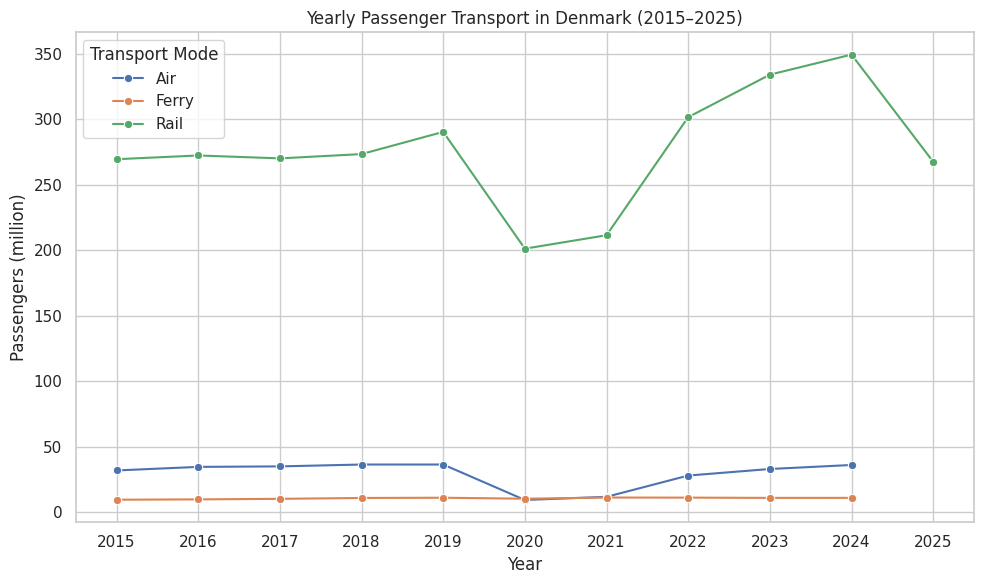

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Line plot using passengers in millions
sns.lineplot(data=all_transport, x="year", y="passengers_million", hue="mode", marker="o")

plt.title("Yearly Passenger Transport in Denmark (2015–2025)")
plt.ylabel("Passengers (million)")
plt.xlabel("Year")
plt.xticks(all_transport['year'].unique())
plt.legend(title="Transport Mode")
plt.tight_layout()
plt.show()
